In [162]:
import pandas as pd
import matplotlib.pyplot as plt

In [163]:
pwd

'C:\\Users\\HP\\Desktop\\17.2 homework\\ultimate_challenge'

In [164]:
df=pd.read_json('logins.json') # read jason file into dataframe
df['n']=1  # adding a number 1 in each row
df.index=pd.to_datetime(df.login_time) # change dataframe index to datetime index
df.drop('login_time',axis=1,inplace=True) # drop the original login_time column
df.head(10) 

,n
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1
1970-01-01 20:21:41,1
1970-01-01 20:12:16,1
1970-01-01 20:35:47,1
1970-01-01 20:35:38,1


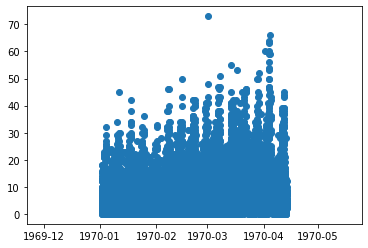

In [165]:
df1=df.resample('15T',label='right').sum() #downsample the index into 15 minutes
plt.scatter(df1.index,df1.n) # plot the dataframe into 15 minute bins
plt.show() #show the plot

In [166]:
df1['time']=df1.index.time # adding login time as a new column regardless of the date

df1

,n,time
login_time,,
1970-01-01 20:15:00,2,20:15:00
1970-01-01 20:30:00,6,20:30:00
1970-01-01 20:45:00,9,20:45:00
1970-01-01 21:00:00,7,21:00:00
1970-01-01 21:15:00,1,21:15:00
...,...,...
1970-04-13 18:00:00,5,18:00:00
1970-04-13 18:15:00,5,18:15:00
1970-04-13 18:30:00,2,18:30:00


In [167]:
df1=df1.sort_values('time') # sort the dataframe by time column

In [168]:
df2=df1.groupby('time').sum() # group the dataframe by time column and count the total clicks within 15 minutes bin

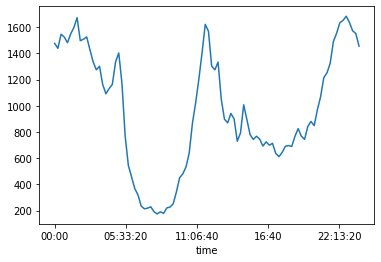

In [169]:
plt.plot(df2.index,df2.n) # plot the dataframe by the 15 minutes by time only regardless of the date
plt.show() # show the plot

In [170]:
df1['month']=df1.index.month # adding in a new month column into dataframe
df1['weekday']=df1.index.weekday
df1.weekday=df1.weekday.replace([0,1,2,3,4,5,6],['Mon','Tue','Wed','Thur','Fri','Sat','Sun'])
df1.head()

,n,time,month,weekday
login_time,,,,
1970-03-26,27,00:00:00,3,Thur
1970-03-22,11,00:00:00,3,Sun
1970-03-27,18,00:00:00,3,Fri
1970-02-21,17,00:00:00,2,Sat
1970-01-29,13,00:00:00,1,Thur


In [171]:
df_weekday=df1.groupby(['weekday'])['n'].sum()
df_weekday

weekday
Fri     15152
Mon      8849
Sat     19434
Sun     18248
Thur    11951
Tue      9226
Wed     10282
Name: n, dtype: int64

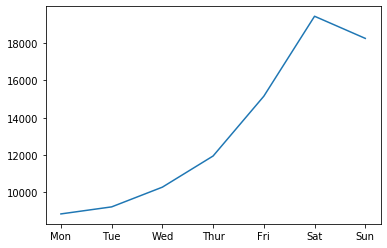

In [172]:
plt.plot(['Mon','Tue','Wed','Thur','Fri','Sat','Sun'],[df_weekday['Mon'],df_weekday['Tue'],df_weekday['Wed'],df_weekday['Thur'],df_weekday['Fri'],df_weekday['Sat'],df_weekday['Sun']])


In [173]:
df_month_time=df1.groupby(['month','time']).sum() # group the dataframe by month and time column, adding up the counts within 15 mins interval
df_month_time

n
month time         
1     00:00:00  335
      00:15:00  313
      00:30:00  361
      00:45:00  339
      01:00:00  372
...             ...
4     22:45:00  250
      23:00:00  226
      23:15:00  199
      23:30:00  206
      23:45:00  220

[384 rows x 1 columns]

In [175]:
print(df_month_time.xs(1)) # print January data

            n
time         
00:00:00  335
00:15:00  313
00:30:00  361
00:45:00  339
01:00:00  372
...       ...
22:45:00  388
23:00:00  362
23:15:00  350
23:30:00  311
23:45:00  287

[96 rows x 1 columns]


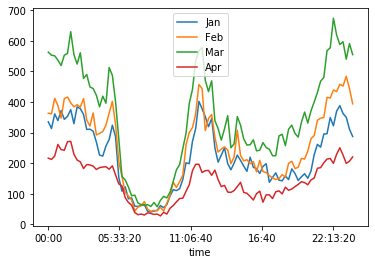

In [177]:
plt.plot(df_month_time.xs(1).index,df_month_time.xs(1).n) # plot total counts versus 15 minutes interval in Jan
plt.plot(df_month_time.xs(2).index,df_month_time.xs(2).n) # plot total counts versus 15 minutes interval in Feb
plt.plot(df_month_time.xs(3).index,df_month_time.xs(3).n) # plot total counts versus 15 minutes interval in Mar
plt.plot(df_month_time.xs(4).index,df_month_time.xs(4).n) # plot total counts versus 15 minutes interval in Apr
plt.legend(['Jan','Feb','Mar','Apr']) # show the legend in the plot
plt.show() # show the plot